In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

### Problem 1: Small dataset

#### 1. Loading the Data

In [2]:
X = np.load('../../data/p1/X.npy')
X.shape

(511, 45768)

In [3]:
X[:, 0].max()

np.float64(11.941397591320595)

#### 2. Transform the Data

In [4]:
X_log = np.log2(X+1)
X_log[:, 0].max()

np.float64(3.6939215228197613)

#### 3. Principal Components and Explained Variance

In [44]:
pcaX = PCA()
pcaX.fit(X)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [45]:
pcaX.explained_variance_ratio_[0]

np.float64(0.42779670983572654)

In [46]:
pcaX_log = PCA()
pcaX_log.fit(X_log)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [47]:
pcaX_log.explained_variance_ratio_[0]

np.float64(0.1388756487082619)

In [48]:
cum_var = np.cumsum(pcaX.explained_variance_ratio_)
n_components_85 = np.argmax(cum_var >= 0.85) + 1
print("PCs needed:", n_components_85)

PCs needed: 36


In [49]:
cum_var = np.cumsum(pcaX_log.explained_variance_ratio_)
n_components_85 = np.argmax(cum_var >= 0.85) + 1
print("PCs needed:", n_components_85)

PCs needed: 339


#### 4. Plotting without Visualization Technique

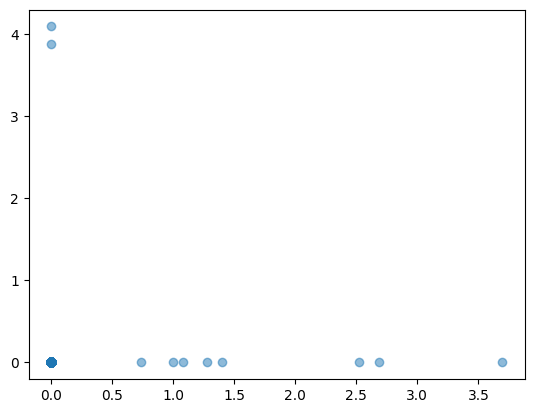

In [50]:
# initial data
plt.scatter(X_log[:, 0], X_log[:, 1], alpha=0.5)
plt.show()

#### 5. PCA

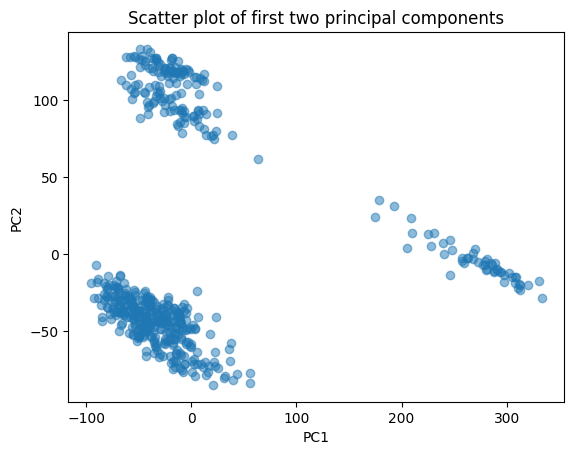

In [98]:
# PCA 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_log)

# Scatter plot PC1 and PC2
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of first two principal components")
plt.show()

#### 6. MDS

/home/leonel-unix/workspace/MITx-6.419x-data-analysis/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


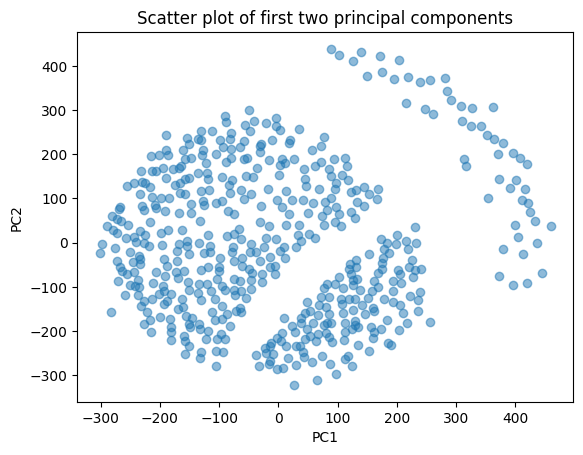

In [12]:
# MDS
mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean")
X_mds = mds.fit_transform(X_log)

# Scatter plot PC1 and PC2
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of first two principal components")
plt.show()

#### 7. T-SNE

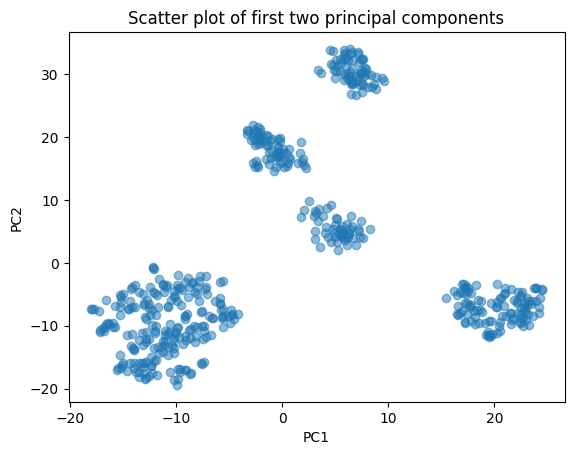

In [6]:
# PCA 50 components
pca50 = PCA(n_components=50, random_state=1)
X_pca50 = pca50.fit_transform(X_log)

# t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=1)
X_tsne = tsne.fit_transform(X_pca50)

# Scatter plot PC1 and PC2
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of first two principal components")
plt.show()

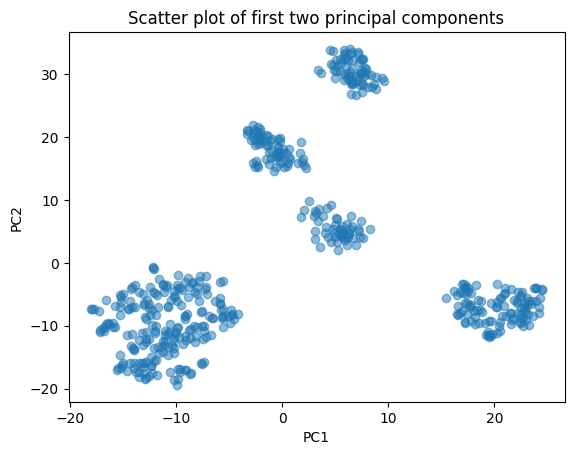

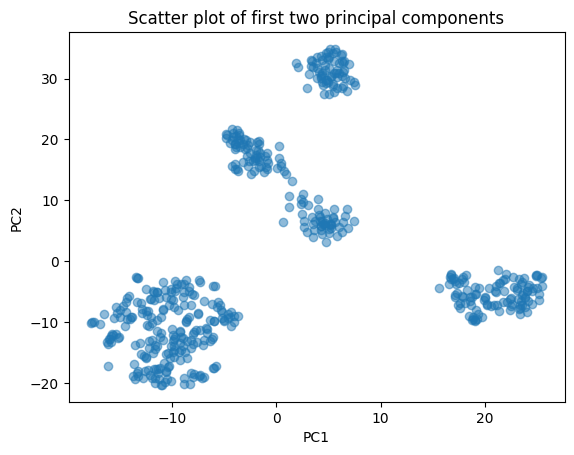

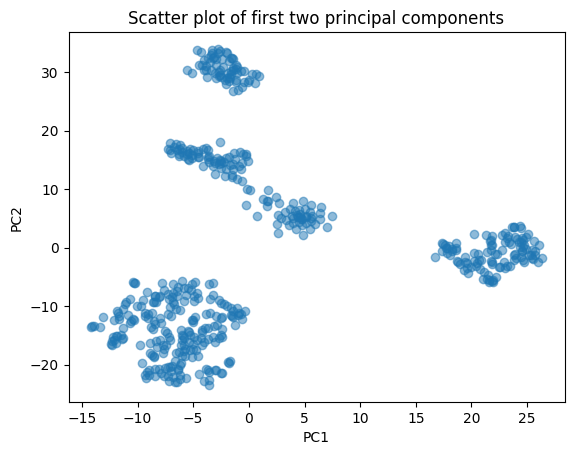

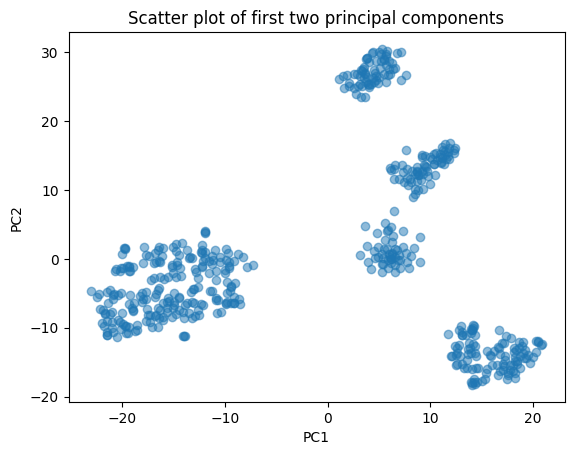

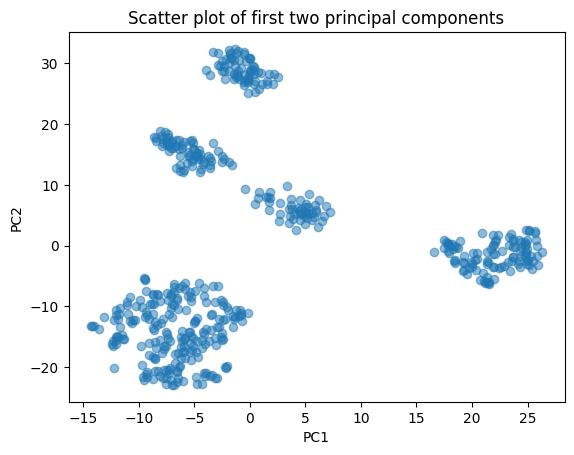

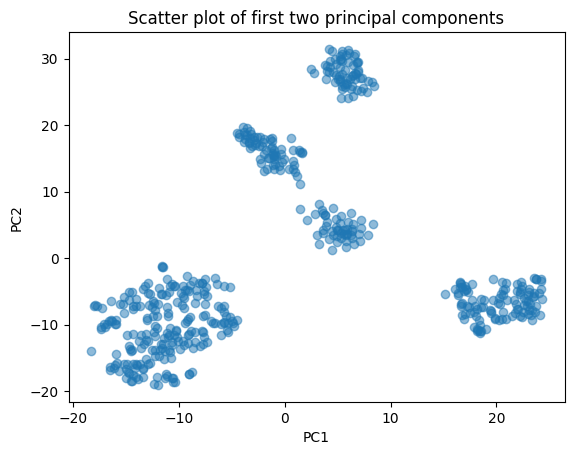

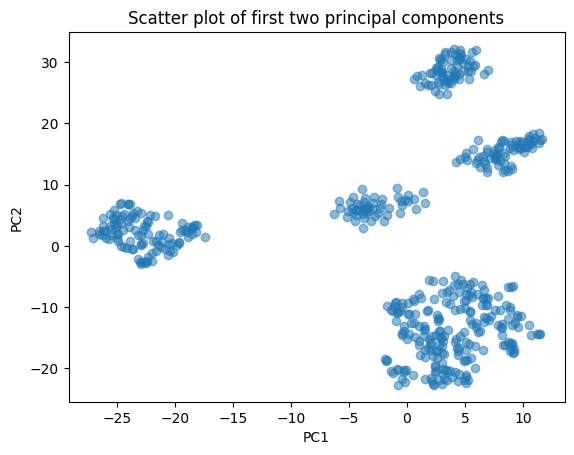

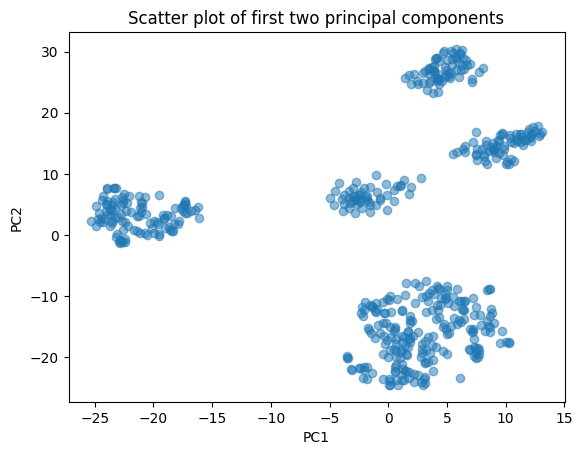

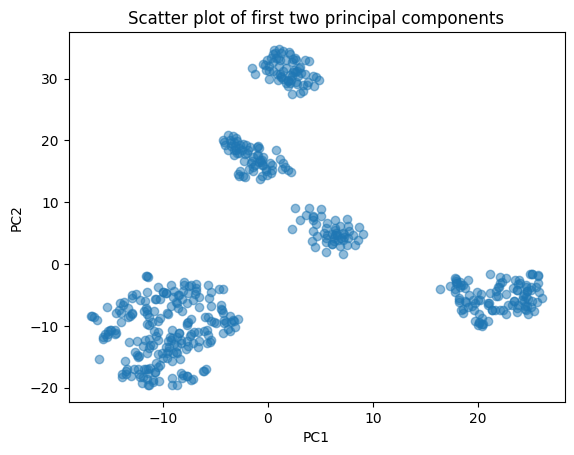

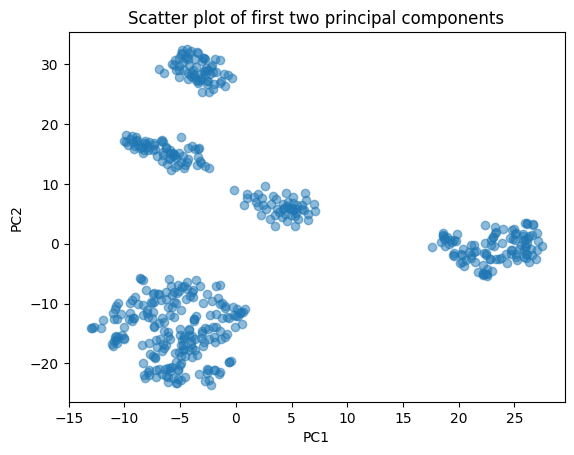

In [8]:
def tsne_seed(seed):
    pca50 = PCA(n_components=50, random_state=seed)
    X_pca50 = pca50.fit_transform(X_log)

    # t-SNE
    tsne = TSNE(n_components=2, perplexity=40, random_state=seed)
    X_tsne = tsne.fit_transform(X_pca50)

    # Scatter plot PC1 and PC2
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Scatter plot of first two principal components")
    plt.show()


seed = [1,2,3,4,5,6,7,8,9,10]

for s in seed:
    tsne_seed(s)

#### 8. Visualizing K-means Clustering

In [15]:
X = np.load('../../data/p1/X.npy')
X_log = np.log2(X+1)
pcaX_log = PCA(n_components=50, random_state=42)
pcaX_log.fit(X_log)
X_pca50 = pcaX_log.transform(X_log)

In [16]:
## k-means
from sklearn.cluster import KMeans

def clusters(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.labels_

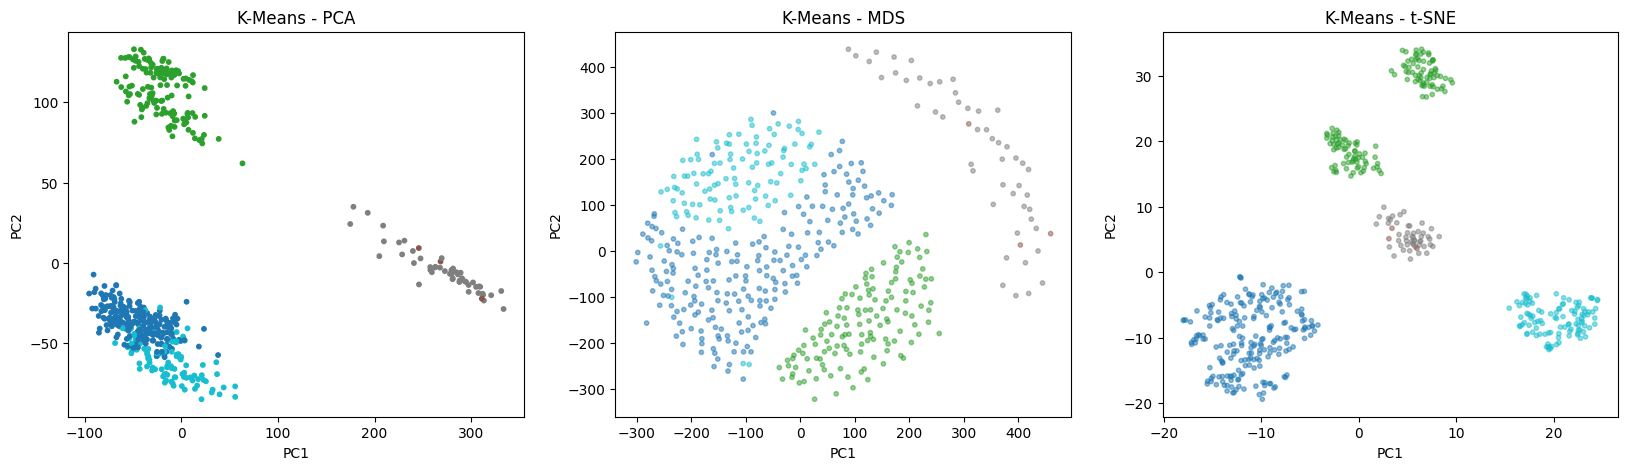

In [17]:
clustersPCA = clusters(5, X_pca50)
clustersMDS = clusters(5, X_pca50)
clustersTSNE = clusters(5, X_pca50)

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(X_pca50[:, 0], X_pca50[:, 1], c=clustersPCA, cmap='tab10', s=10)
plt.title("K-Means - PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1,3,2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.5,c=clustersMDS, cmap='tab10', s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means - MDS")

plt.subplot(1,3,3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c=clustersTSNE, cmap='tab10', s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means - t-SNE")

plt.show()

#### 9. Elbow Method

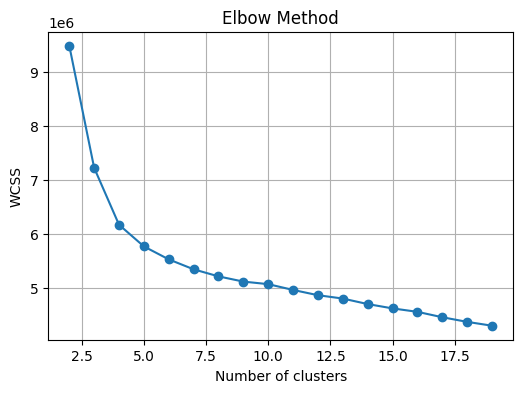

In [102]:
wcss = [] 
K_values = range(2, 20)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca50)
    wcss.append(kmeans.inertia_)

# Graficar método del codo
plt.figure(figsize=(6,4))
plt.plot(K_values, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_pca50)

inertia_k5 = kmeans.inertia_
print(inertia_k5)

5766599.608361043


#### 11. Visualizing cluster means

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [22]:
centroids = kmeans.cluster_centers_
centroids.shape
# centroids

(5, 45768)

In [25]:
# PCA
pca_centroids = PCA(n_components=2, random_state=42)
centroids_pca2 = pca_centroids.fit_transform(centroids)

# MDS
mds_centroids = MDS(n_components=2, random_state=42, dissimilarity="euclidean")
centroids_mds2 = mds_centroids.fit_transform(centroids)

# Tsne
tsne_centroids = TSNE(n_components=2, perplexity=4, random_state=42)
centroids_tsne2 = tsne_centroids.fit_transform(centroids)

/home/leonel-unix/workspace/MITx-6.419x-data-analysis/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


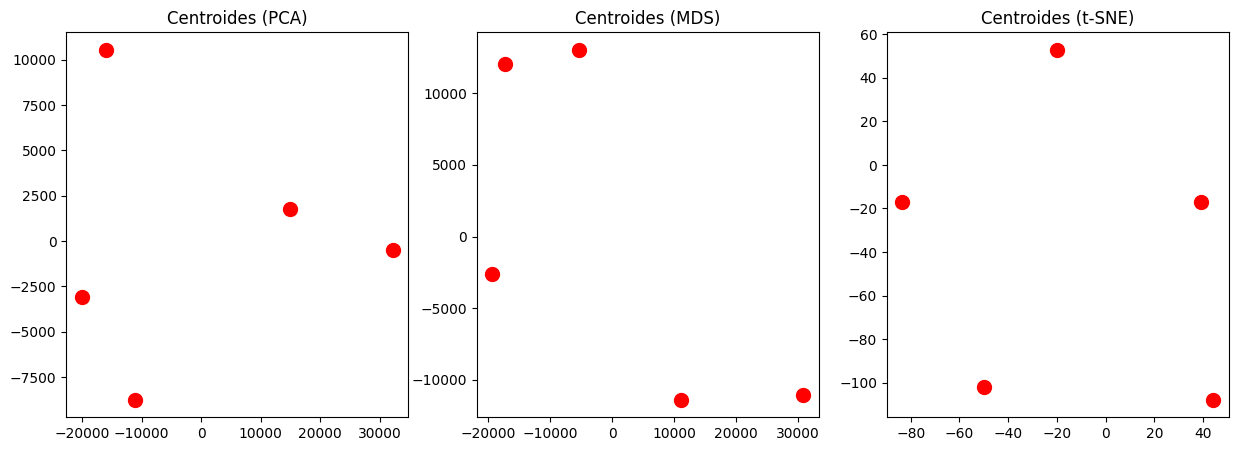

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(centroids_pca2[:, 0], centroids_pca2[:, 1], c='red', s=100)
plt.title("Centroides (PCA)")

plt.subplot(1,3,2)
plt.scatter(centroids_mds2[:, 0], centroids_mds2[:, 1], c='red', s=100)
plt.title("Centroides (MDS)")

plt.subplot(1,3,3)
plt.scatter(centroids_tsne2[:, 0], centroids_tsne2[:, 1], c='red', s=100)
plt.title("Centroides (t-SNE)")

plt.show()

#### 12. What if We Did Not Transform Data

In [86]:
# PCA 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# MDS
mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean")
X_mds = mds.fit_transform(X)

# t-SNE
pca50 = PCA(n_components=50, random_state=42)
X_pca50 = pca50.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_pca50)

/home/leonel-unix/workspace/MITx-6.419x-data-analysis/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


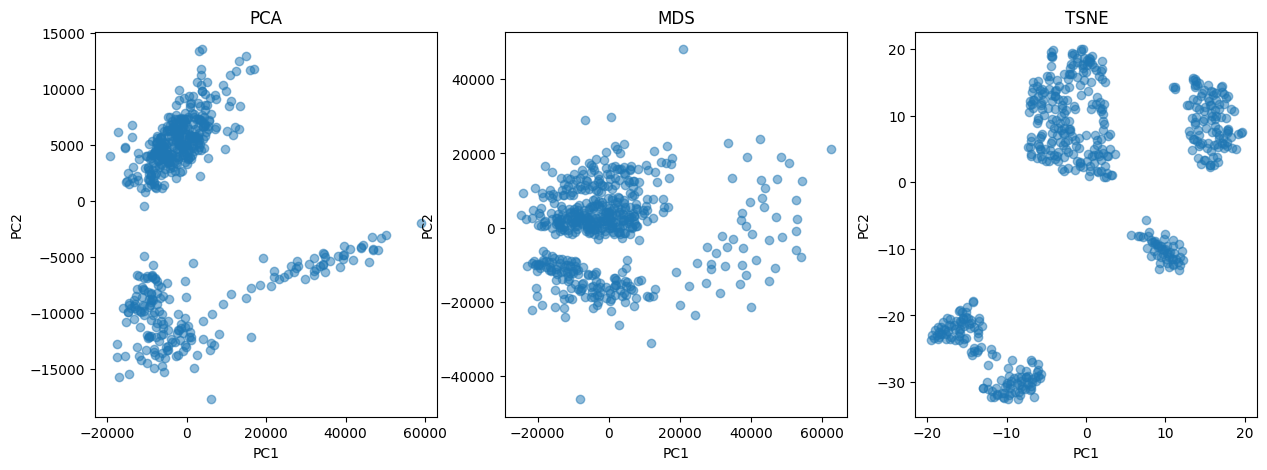

In [90]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")

plt.subplot(1,3,2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("MDS")

plt.subplot(1,3,3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("TSNE")

plt.show()

### Problem 2: Larger unlabeled subset (Written Report)

In [104]:
# Data Preparation

X = np.load('../../data/p2_unsupervised/X.npy')
X.shape


(2169, 45768)

In [106]:
X_log = np.log2(X+1)
X_log[:, 0].max()

np.float64(5.972169178513185)